In [2]:
import os, sys
import numpy as np
import pandas as pd

import glob
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Приготвяне на данните

In [3]:
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

### Изваждане на path-овете на снимките

In [4]:
images_paths = glob.glob('./train/*/*.png')
images_paths
for index, el in enumerate(images_paths):
    images_paths[index]=(el.replace("\\","/"))
images_paths[:10]

['./train/Black-grass/0050f38b3.png',
 './train/Black-grass/0183fdf68.png',
 './train/Black-grass/0260cffa8.png',
 './train/Black-grass/05eedce4d.png',
 './train/Black-grass/075d004bc.png',
 './train/Black-grass/078eae073.png',
 './train/Black-grass/082314602.png',
 './train/Black-grass/0ace21089.png',
 './train/Black-grass/0b228a6b8.png',
 './train/Black-grass/0b3e7a7a9.png']

### Добавяне на преоразмерените снимки в списък

In [5]:
label = []
images = []
for f in images_paths:
    if f[-3:] != 'png':
        continue
    label.append(f.split('/')[-2])
    new_images = Image.open(f)
    images.append(ImageOps.fit(new_images, (50, 50), Image.ANTIALIAS).convert('RGB'))

##### Трансформиране на Label в бинарен вид

In [6]:
lb = LabelBinarizer().fit(label)
label_bin = lb.transform(label)

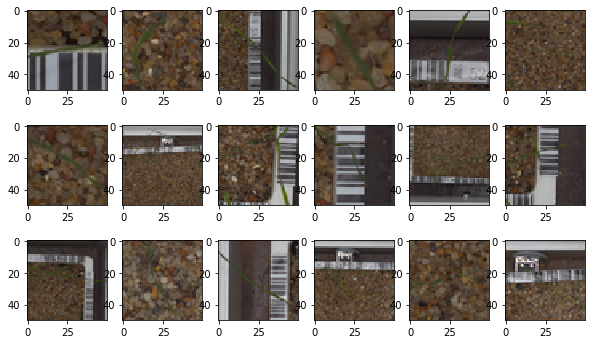

In [7]:
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(images[i])

In [8]:
images_np = np.array([np.array(im) for im in images])
images_np = images_np/255
print(len(images_np))
print(images_np[0].shape)
print(images_np[0])

4750
(50, 50, 3)
[[[0.32941176 0.21176471 0.1254902 ]
  [0.37254902 0.29019608 0.21176471]
  [0.38431373 0.31372549 0.23529412]
  ...
  [0.36470588 0.32156863 0.2745098 ]
  [0.35294118 0.30980392 0.25098039]
  [0.34901961 0.30980392 0.22745098]]

 [[0.33333333 0.21176471 0.12156863]
  [0.30980392 0.20392157 0.1254902 ]
  [0.32941176 0.25490196 0.18039216]
  ...
  [0.34901961 0.29019608 0.24313725]
  [0.3372549  0.28235294 0.23529412]
  [0.32156863 0.27058824 0.21568627]]

 [[0.33333333 0.23921569 0.14117647]
  [0.27058824 0.18431373 0.09411765]
  [0.30196078 0.23137255 0.14901961]
  ...
  [0.3372549  0.2627451  0.22745098]
  [0.35294118 0.29019608 0.24313725]
  [0.30980392 0.25490196 0.19607843]]

 ...

 [[0.57647059 0.6        0.62745098]
  [0.4745098  0.48235294 0.50980392]
  [0.23529412 0.21176471 0.22352941]
  ...
  [0.55686275 0.59215686 0.60784314]
  [0.56078431 0.58039216 0.60392157]
  [0.35294118 0.32941176 0.36078431]]

 [[0.57647059 0.6        0.62745098]
  [0.4745098  0.4823

# Започваме с невронната мрежа

In [9]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalMaxPooling2D, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam

Using TensorFlow backend.


In [16]:
#trainX, validX, trainY, validY = train_test_split(images_np, label_bin, test_size=0.05, random_state=42)

In [46]:
input = keras.Input(shape=(50, 50, 3))

##17% test

# x = Conv2D(32, 5, padding='same', activation='relu')(x)
# x = BatchNormalization () (x)
# x = Dropout(0.25)(x)
# x = Conv2D(64, 5, padding='same', activation='relu')(x)
# x = BatchNormalization () (x)
# x = Dropout(0.25) (x)
# x = Conv2D(32, 5, padding='same', activation='relu')(x)
# x = Dropout(0.25) (x)
# x = Conv2D(64, 5, padding='same', activation='relu')(x)
# x = MaxPooling2D((2,2))(x)
# x = Dropout(0.25) (x)
# x = Conv2D(32, 5, padding='same', activation='relu')(x)
# x = MaxPooling2D((2,2))(x)
# x = Dropout(0.25) (x)

x = Conv2D(32, 5, padding='same', activation='relu')(input)
# x = MaxPooling2D((2,2))(x)
x = BatchNormalization () (x)
x = Dropout(0.1)(x)

x = Conv2D(64, 5, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
# x = BatchNormalization () (x)
x = Dropout(0.1)(x)

x = Conv2D(128, 5, padding='same', activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.1)(x)

x = Conv2D(256, 5, padding='same', activation='relu')(x)
x = MaxPooling2D((2,2))(x)
# x = BatchNormalization () (x)
x = Dropout(0.1)(x) 

x = Conv2D(128, 5, padding='same', activation='relu')(x)
x = MaxPooling2D((2,2))(x)
# x = BatchNormalization () (x)
x = Dropout(0.1)(x) 

x = Conv2D(64, 5, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
# x = BatchNormalization () (x)
x = Dropout(0.1)(x)

# # x = Conv2D(32, 5, padding='same', activation='relu')(x)
# # x = MaxPooling2D()(x)
# # x = Dropout(0.2)(x)

# # x = Conv2D(128, 5, padding='same', activation='relu')(x)
# # x = MaxPooling2D()(x)
# # #x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(500, activation='relu')(x)

x = Dense(12, activation='softmax')(x)

In [47]:
model = Model(inputs=input, outputs=x)
model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 50, 50, 32)        2432      
_________________________________________________________________
batch_normalization_60 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
dropout_82 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 25, 25, 64)        0         
__________

In [49]:
hist = model.fit(images_np, label_bin,
          batch_size=64,
          epochs=100,
          validation_split=0.1)

Train on 4275 samples, validate on 475 samples
Epoch 1/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.3677 - acc: 0.8697 - val_loss: 10.6108 - val_acc: 0.1747
Epoch 2/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.3608 - acc: 0.8739 - val_loss: 10.5628 - val_acc: 0.1726
Epoch 3/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.3303 - acc: 0.8819 - val_loss: 10.8757 - val_acc: 0.1747
Epoch 4/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.3034 - acc: 0.8901 - val_loss: 10.8999 - val_acc: 0.1726
Epoch 5/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.2884 - acc: 0.8926 - val_loss: 11.3990 - val_acc: 0.1579
Epoch 6/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.2982 - acc: 0.8926 - val_loss: 11.2698 - val_acc: 0.1684
Epoch 7/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.2521 - acc: 0.9060 - val_loss: 11.6250 - val_acc: 0

4275/4275 [==============================] - 10s 2ms/step - loss: 0.0223 - acc: 0.9932 - val_loss: 13.0415 - val_acc: 0.1705
Epoch 61/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.0257 - acc: 0.9916 - val_loss: 13.0799 - val_acc: 0.1747
Epoch 62/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.0221 - acc: 0.9935 - val_loss: 13.0309 - val_acc: 0.1684
Epoch 63/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.0165 - acc: 0.9958 - val_loss: 13.0710 - val_acc: 0.1768
Epoch 64/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.0244 - acc: 0.9916 - val_loss: 13.0486 - val_acc: 0.1789
Epoch 65/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.0418 - acc: 0.9857 - val_loss: 13.0554 - val_acc: 0.1705
Epoch 66/100
4275/4275 [==============================] - 10s 2ms/step - loss: 0.0354 - acc: 0.9874 - val_loss: 12.9890 - val_acc: 0.1705
Epoch 67/100
4275/4275 [=======================

In [21]:
input = keras.Input(shape=(48, 48, 3))

x = Conv2D(16, (3, 3), activation='relu')(input)
x = BatchNormalization(axis = 3)(x)

x = Conv2D(16, (3, 3), activation='relu')(x)
x = BatchNormalization(axis = 3)(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu')(x)
x = BatchNormalization(axis = 3)(x)

x = Conv2D(32, (3, 3), activation='relu')(x)
x = BatchNormalization(axis = 3)(x)
x = GlobalMaxPooling2D()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(12, activation='softmax')(x)


In [22]:
model = Model(inputs=input, outputs=x)
model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 46, 46, 16)        448       
_________________________________________________________________
batch_normalization_13 (Batc (None, 46, 46, 16)        64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 44, 44, 16)        2320      
_________________________________________________________________
batch_normalization_14 (Batc (None, 44, 44, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 32)        4640      
__________

In [25]:
hist = model.fit(images_np, label_bin,
          batch_size=64,
          epochs=50,
          validation_split=0.05)

Train on 4512 samples, validate on 238 samples
Epoch 1/50
4512/4512 [==============================] - 6s 1ms/step - loss: 5.6798 - acc: 0.1028 - val_loss: 2.2967 - val_acc: 0.0630
Epoch 2/50
4512/4512 [==============================] - 4s 842us/step - loss: 3.8638 - acc: 0.0995 - val_loss: 2.2370 - val_acc: 0.0882
Epoch 3/50
4512/4512 [==============================] - 4s 870us/step - loss: 3.1873 - acc: 0.1148 - val_loss: 2.4163 - val_acc: 0.0084
Epoch 4/50
4512/4512 [==============================] - 4s 872us/step - loss: 2.9092 - acc: 0.1108 - val_loss: 2.4830 - val_acc: 0.0084
Epoch 5/50
4512/4512 [==============================] - 4s 858us/step - loss: 2.7494 - acc: 0.1135 - val_loss: 2.5312 - val_acc: 0.0000e+00
Epoch 6/50
4512/4512 [==============================] - 4s 868us/step - loss: 2.6663 - acc: 0.1219 - val_loss: 2.5422 - val_acc: 0.0000e+00
Epoch 7/50
4512/4512 [==============================] - 4s 864us/step - loss: 2.6260 - acc: 0.1241 - val_loss: 2.5505 - val_acc: 0.

In [46]:
input = keras.Input(shape=(50, 50, 3))

x = Conv2D(32, 5, activation='relu')(input)
x = MaxPooling2D(2)(x)

x = Conv2D(64, 5, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(32, 5, activation='relu')(x)
x = MaxPooling2D(2)(x)

# x = Conv2D(64, 5, activation='relu')(x)
# x = MaxPooling2D()(x)

# x = Conv2D(32, 5, activation='relu')(x)
# x = MaxPooling2D()(x)

# x = Conv2D(64, 5, activation='relu')(x)
# x = MaxPooling2D()(x)
 
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.8)(x)

x = Dense(12, activation='softmax')(x)



In [47]:
model = Model(inputs=input, outputs=x)
model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 5, 5, 32)          51232     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 2, 2, 32)          0         
__________

In [48]:
hist = model.fit(images_np, label_bin,
          batch_size=64,
          epochs=20,
          validation_split=0.05)

Train on 4512 samples, validate on 238 samples
Epoch 1/20
4512/4512 [==============================] - 4s 920us/step - loss: 2.4478 - acc: 0.1303 - val_loss: 3.0232 - val_acc: 0.0000e+00
Epoch 2/20
4512/4512 [==============================] - 3s 642us/step - loss: 2.3654 - acc: 0.1941 - val_loss: 3.1817 - val_acc: 0.0000e+00
Epoch 3/20
4512/4512 [==============================] - 3s 675us/step - loss: 2.1591 - acc: 0.2633 - val_loss: 3.1550 - val_acc: 0.0000e+00
Epoch 4/20
4512/4512 [==============================] - 3s 658us/step - loss: 2.0174 - acc: 0.2764 - val_loss: 3.2676 - val_acc: 0.0000e+00
Epoch 5/20
4512/4512 [==============================] - 3s 641us/step - loss: 1.9437 - acc: 0.2934 - val_loss: 3.1813 - val_acc: 0.0000e+00
Epoch 6/20
4512/4512 [==============================] - 3s 679us/step - loss: 1.8925 - acc: 0.3118 - val_loss: 3.0605 - val_acc: 0.0000e+00
Epoch 7/20
4512/4512 [==============================] - 3s 658us/step - loss: 1.8528 - acc: 0.3262 - val_loss: 2.